In [1]:
import MyLibrary.phantom as ph
import MyLibrary.RayTransform as RT

import numpy as np
import matplotlib.pyplot as plt

## Fanbeam with plane detectors


This geometry can be selected with the attribute <code>modality  = 'fanbeam-plane'</code>. Here the detector set is assumed to be a segment. The source is located arbitrarily but orthogonal to the detector set.

The parameters of the system are therefore $\varphi$, the rotation angle, and $x_d$ the $x$-coordinate of the corresponding detector.

To switch back the fanbeam geometry to parallel beams requires the following relationship regarding the detector position:
$$
x_d = \frac{(OS+OD)p}{\sqrt{OS^2-p^2}} \quad \text{and} \quad
p = \frac{OS \times x_d}{\sqrt{(OS+OD)^2+x_d^2}}
$$

<img src="./Images/CTscan_fanbeam_plane.png" alt="" width="400" height="400"/>

In [2]:
#Parameters of the CT-scan
modality  = 'fanbeam-plane'
N         = 50
Nrota     = N
Ndetector = 2*N
center    = [N/2,N/2]
distOS    = N
distOD    = N/np.sqrt(2)
widthD    = 2*N

param_detector = np.arange(0,widthD,widthD/Ndetector) - widthD/2 
param_rota     = -np.pi/2 + 2*np.arange(0,Nrota)*np.pi/(Nrota-1) 
parameters     = (param_detector,param_rota,N,center,distOS,distOD)

In [3]:
#Selection of the phantom
f0 = ph.phantom(N)

In [4]:
#Computation of the projection matrix and data
Xplane = RT.RayTransform(parameters,modality=modality)
Xplane.computeProjectionMatrix(method='gaussian')
gplane = Xplane.getData(f0) 

Projection Matrix: [##########]100%  Time elapsed: 0.9 seconds


In [5]:
#Switch to the parallel geometry
p              = -N/2 + N*np.arange(0,1,1/Ndetector)
dp             = p[1] - p[0]
phi            = np.arange(0,Nrota)*np.pi/(Nrota-1) 
g_plane2para   = Xplane.switchfanbeam2parallel(gplane,(p,phi))
new_parameters = (p,phi,N,center)
R              = RT.RayTransform(new_parameters,modality = 'parallel')
gRT            = R.RadonTransform(f0)

Fanbeam --> Parallel: [##########]100%  Time elapsed: 0.0 seconds
Line integrals: [##########]100%  Time elapsed: 1.1 seconds


In [6]:
#Computation of the FBP and Approximate Inverse
fFBP_plane2para = R.FBP(g_plane2para)
fAI_plane  = Xplane.ApproximateInverseRT(gplane,gamma=dp)

FBP: [##########]100%  Time elapsed: 0.0 seconds
ApproxInverse: [##########]100%  Time elapsed: 0.2 seconds


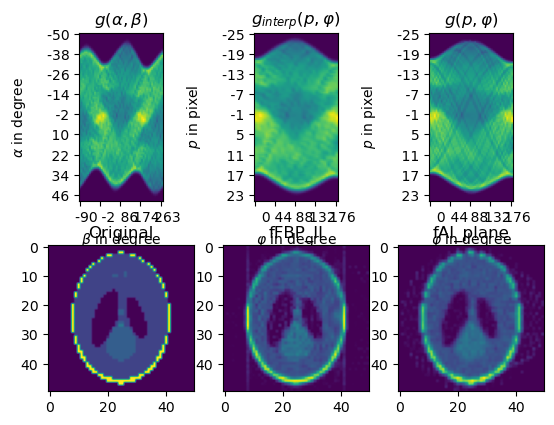

In [7]:
#Visualisation of the data and FBP-type reconstructions
fig, axs = plt.subplots(2, 3, num=2)
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 10})

xticks = np.arange(0,Nrota,int(Nrota/4))
xticklabels = ["{:6.0f}".format(i) for i in 180/np.pi*param_rota[xticks]]
yticks = np.arange(0,Ndetector,int(Ndetector/8))
yticklabels = ["{:6.0f}".format(i) for i in param_detector[yticks]]

axs[0,0].imshow(gplane)
axs[0,0].set_xticks(xticks)
axs[0,0].set_xticklabels(xticklabels)
axs[0,0].set_yticks(yticks)
axs[0,0].set_yticklabels(yticklabels)
axs[0,0].set(xlabel=r'$\beta$ in degree', ylabel=r'$\alpha$ in degree',title=r'$g(\alpha,\beta)$')

xticks = np.arange(0,Nrota,int(Nrota/4))
xticklabels = ["{:6.0f}".format(i) for i in 180/np.pi*phi[xticks]]
yticks = np.arange(0,Ndetector,int(Ndetector/8))
yticklabels = ["{:6.0f}".format(i) for i in p[yticks]]

axs[0,1].imshow(g_plane2para)
axs[0,1].set_xticks(xticks)
axs[0,1].set_xticklabels(xticklabels)
axs[0,1].set_yticks(yticks)
axs[0,1].set_yticklabels(yticklabels)
axs[0,1].set(xlabel=r'$\varphi$ in degree', ylabel=r'$p$ in pixel',title=r'$g_{interp}(p,\varphi)$')

axs[0,2].imshow(gRT)
axs[0,2].set_xticks(xticks)
axs[0,2].set_xticklabels(xticklabels)
axs[0,2].set_yticks(yticks)
axs[0,2].set_yticklabels(yticklabels)
axs[0,2].set(xlabel=r'$\varphi$ in degree', ylabel=r'$p$ in pixel',title=r'$g(p,\varphi)$')



axs[1,0].imshow(f0)
axs[1,0].set_title('Original')
axs[1,1].imshow(fFBP_plane2para)
axs[1,1].set_title('fFBP_II')
axs[1,2].imshow(fAI_plane)
axs[1,2].set_title('fAI_plane')

plt.show()